In [1]:
# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# visualize 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm
import itertools as it

# holt's linear trend model. 
from statsmodels.tsa.api import Holt

#important import 
import pandas as pd
import numpy as np
import os
import wrangle as w

In [2]:
# plotting defaults
plt.rc('figure', figsize=(16, 7))
plt.style.use('seaborn-dark-palette')
plt.rc('font', size=16)

In [3]:
#Acquire superstore data from codeup database
df = w.get_superstore_data()

In [4]:
df.head()

,Region ID,Category ID,Product ID,Customer ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,...,Postal Code,Sales,Quantity,Discount,Profit,Customer Name,Product Name,Category,Sub-Category,Region Name
0,1,1,FUR-BO-10001798,CG-12520,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,...,42420.0,261.9600,2.0,0.00,41.9136,Claire Gute,Bush Somerset Collection Bookcase,Furniture,Bookcases,South
1,1,2,FUR-CH-10000454,CG-12520,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,...,42420.0,731.9400,3.0,0.00,219.5820,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs,South
2,1,4,FUR-TA-10000577,SO-20335,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,...,33311.0,957.5775,5.0,0.45,-383.0310,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables,South
3,1,5,OFF-ST-10000760,SO-20335,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,...,33311.0,22.3680,2.0,0.20,2.5164,Sean O'Donnell,Eldon Fold 'N Roll Cart System,Office Supplies,Storage,South
4,1,11,OFF-PA-10002365,AA-10480,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,Consumer,United States,...,28027.0,15.5520,3.0,0.20,5.4432,Andrew Allen,Xerox 1967,Office Supplies,Paper,South


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1734 entries, 0 to 1733
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region ID      1734 non-null   int64  
 1   Category ID    1734 non-null   int64  
 2   Product ID     1734 non-null   object 
 3   Customer ID    1734 non-null   object 
 4   Order ID       1734 non-null   object 
 5   Order Date     1734 non-null   object 
 6   Ship Date      1734 non-null   object 
 7   Ship Mode      1734 non-null   object 
 8   Segment        1734 non-null   object 
 9   Country        1734 non-null   object 
 10  City           1734 non-null   object 
 11  State          1734 non-null   object 
 12  Postal Code    1734 non-null   float64
 13  Sales          1734 non-null   float64
 14  Quantity       1734 non-null   float64
 15  Discount       1734 non-null   float64
 16  Profit         1734 non-null   float64
 17  Customer Name  1734 non-null   object 
 18  Product 

In [6]:
#Checking the nulls
df.isnull().sum().sum()

0

In [7]:
#Cleaning superstore data
df = w.prep_superstore(df, 'Order Date', 'Ship Date')

In [8]:
#Check to see if function rename the columns correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1734 entries, 2014-01-04 to 2017-12-30
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ship_date      1734 non-null   datetime64[ns]
 1   ship_mode      1734 non-null   object        
 2   segment        1734 non-null   object        
 3   country        1734 non-null   object        
 4   city           1734 non-null   object        
 5   state          1734 non-null   object        
 6   postal_code    1734 non-null   float64       
 7   sales          1734 non-null   float64       
 8   quantity       1734 non-null   float64       
 9   discount       1734 non-null   float64       
 10  profit         1734 non-null   float64       
 11  customer_name  1734 non-null   object        
 12  product_name   1734 non-null   object        
 13  category       1734 non-null   object        
 14  sub_category   1734 non-null   object        
 15  reg

In [9]:
#Let's take a look about the statistics of numeric values in the data.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
postal_code,1734.0,53501.926182,32180.245224,1841.0000,19143.0000,50315.00000,85705.00000,98661.000
sales,1734.0,229.206358,532.862614,1.0800,16.6950,52.24500,209.91750,8159.952
quantity,1734.0,3.794694,2.297407,1.0000,2.0000,3.00000,5.00000,14.000
discount,1734.0,0.160110,0.206419,0.0000,0.0000,0.20000,0.20000,0.800
profit,1734.0,21.880351,202.891949,-3839.9904,1.7024,8.07305,27.41445,3177.475


In [10]:
#Let's see how many categories of products we have in the data.
df.category.unique()

array(['Office Supplies', 'Technology', 'Furniture'], dtype=object)

In [11]:
df.category.value_counts()

Office Supplies    1055
Furniture           360
Technology          319
Name: category, dtype: int64

In [12]:
# Extract the data of Office Supplies
office_supplies = df.loc[df['category'] == 'Office Supplies']

In [13]:
#Get 4-year office supplies sales data.
office_supplies.index.min(), office_supplies.index.max()

(Timestamp('2014-01-04 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [14]:
office_supplies = office_supplies.sort_values('Order Date')
office_supplies = office_supplies.groupby('Order Date')['sales'].sum().reset_index()
office_supplies.head()

,Order Date,sales
0,2014-01-04,288.060
1,2014-01-09,9.344
2,2014-01-10,2.890
3,2014-01-13,640.520
4,2014-01-16,48.660


In [15]:
office_supplies = office_supplies.set_index('Order Date')
office_supplies.head()

,sales
Order Date,
2014-01-04,288.060
2014-01-09,9.344
2014-01-10,2.890
2014-01-13,640.520
2014-01-16,48.660


In [16]:
#using the start of each month as the timestamp
monthly = office_supplies['sales'].resample('MS').mean()

In [17]:
monthly

Order Date
2014-01-01     173.734000
2014-02-01      58.909500
2014-03-01     163.820286
2014-04-01      99.149250
2014-05-01     483.108000
2014-06-01     357.797111
2014-07-01     172.297667
2014-08-01     281.512444
2014-09-01     144.181143
2014-10-01     121.782500
2014-11-01     310.994889
2014-12-01     166.427077
2015-01-01      27.968000
2015-02-01       5.280000
2015-03-01    1035.816750
2015-04-01     190.845778
2015-05-01     442.653333
2015-06-01      62.553000
2015-07-01     124.763625
2015-08-01     458.844000
2015-09-01     316.783364
2015-10-01     103.108727
2015-11-01     211.088200
2015-12-01     268.964429
2016-01-01      25.830000
2016-02-01     367.092000
2016-03-01     130.030100
2016-04-01     270.821929
2016-05-01     207.683200
2016-06-01     394.874800
2016-07-01     212.724444
2016-08-01     165.482250
2016-09-01     415.461778
2016-10-01     284.847875
2016-11-01     155.968643
2016-12-01     355.051375
2017-01-01     425.522400
2017-02-01     185.209250
2

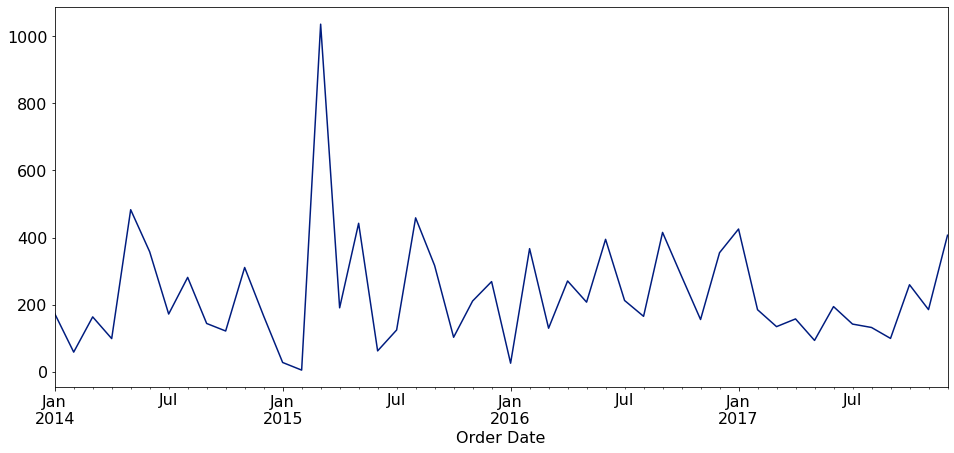

In [18]:
#Lets see monthly sales
monthly.plot()
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are always high at the beginning of the year and low at the end of the year.

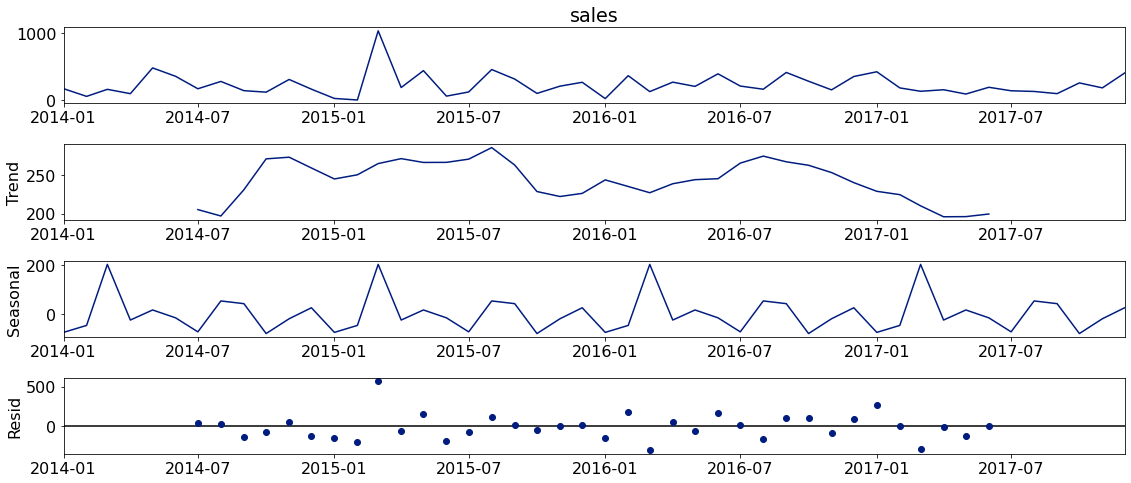

In [19]:
# Using decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.
sm.tsa.seasonal_decompose(monthly).plot()
None

The figure above clearly shows the seasonality in our data, and the trend is gradually increasing through the years.

In [20]:
train, validate, test = w.split_time_series_data(office_supplies)

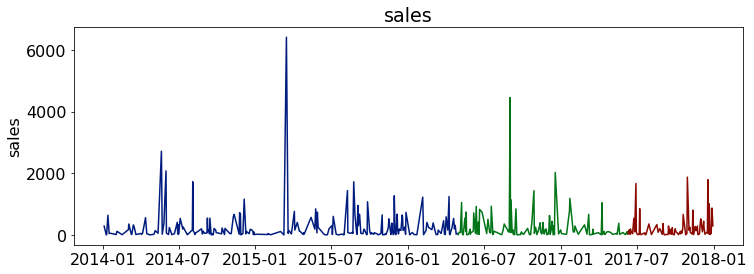

In [21]:
for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [22]:
#From the lesson
def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

def append_eval_df(model_type, target_var):
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

def make_predictions():
    yhat_df = pd.DataFrame({'sales': [sales],
                           }, index = validate.index)
    return yhat_df

**Simple Average**

In [23]:
#sales = round(train['sales'].mean(),2)
#yhat_df = make_predictions()

In [24]:
#for col in train.columns:
   # plot_and_eval(col)

In [25]:
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

In [26]:
#for col in train.columns:
    #eval_df = append_eval_df(model_type='simple_average', target_var = col)
#eval_df

**Moving Average**

In [27]:
#sales = round(train['sales'].rolling(2).mean().iloc[-1], 2)
#yhat_df = make_predictions()

In [28]:
#for col in train.columns:
   # plot_and_eval(col)

In [29]:
#for col in train.columns:
 #   eval_df = append_eval_df(model_type='2 month moving average', 
                             #target_var = col)

IndentationError: unexpected indent (2195005047.py, line 3)

In [ ]:
#periods = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

#for p in periods:
    amounts = round(train['sales'].rolling(p).mean().iloc[-1], 2)
    yhat_df = make_predictions()
    model_type = str(p) + ' month moving average'
    eval_df = append_eval_df(model_type = model_type, target_var = 'sales')

In [ ]:
#eval_df

In [ ]:
#min_rmse_amount = eval_df.groupby('target_var')['rmse'].min()[0]

In [ ]:
#eval_df[((eval_df.rmse == min_rmse_amount))]

## Below this is where my exploration starts

------------------------------------------

In [30]:
train, validate, test = w.split_time_series_data(df)
train.shape
    

(867, 16)

In [31]:
train.head()

,ship_date,ship_mode,segment,country,city,state,postal_code,sales,quantity,discount,profit,customer_name,product_name,category,sub_category,region_name
Order Date,,,,,,,,,,,,,,,,
2014-01-04,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540.0,11.784,3.0,0.2,4.2717,Phillina Ober,Avery 508,Office Supplies,Labels,Central
2014-01-04,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540.0,272.736,3.0,0.2,-64.7748,Phillina Ober,SAFCO Boltless Steel Shelving,Office Supplies,Storage,Central
2014-01-04,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540.0,3.540,2.0,0.8,-5.4870,Phillina Ober,GBC Standard Plastic Binding Systems Combs,Office Supplies,Binders,Central
2014-01-09,2014-01-13,Standard Class,Consumer,United States,Laredo,Texas,78041.0,31.200,3.0,0.2,9.7500,Melanie Seite,Memorex Micro Travel Drive 8 GB,Technology,Accessories,Central
2014-01-09,2014-01-13,Standard Class,Consumer,United States,Laredo,Texas,78041.0,9.344,2.0,0.2,1.1680,Melanie Seite,Newell 312,Office Supplies,Art,Central


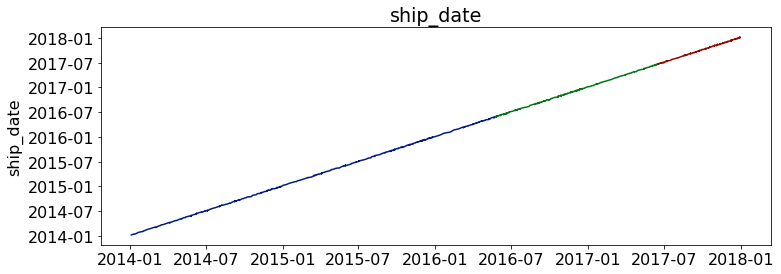

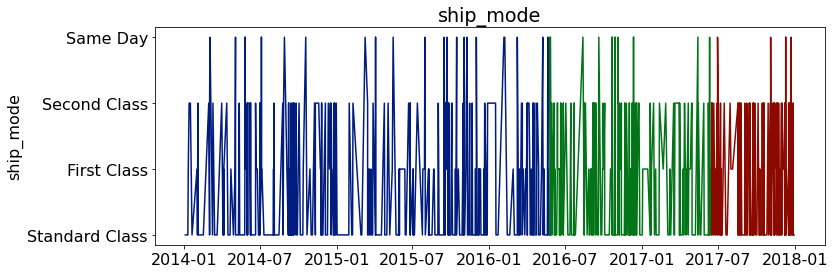

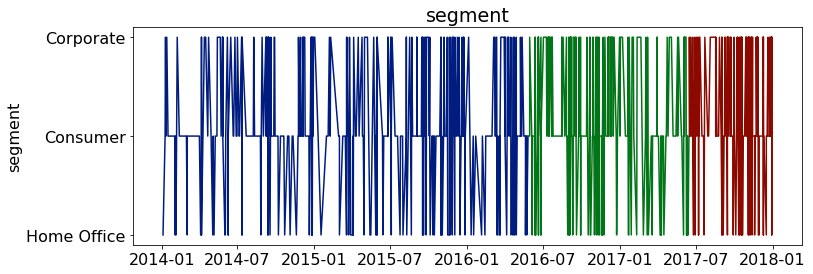

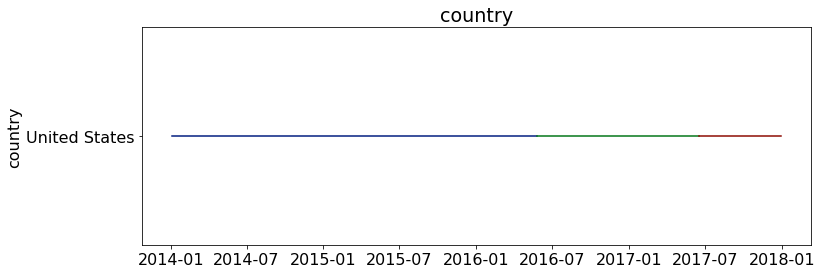

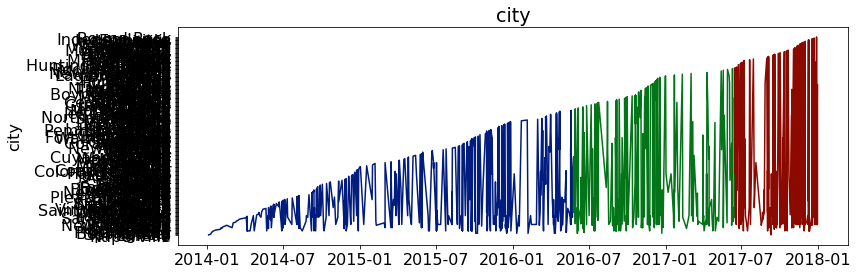

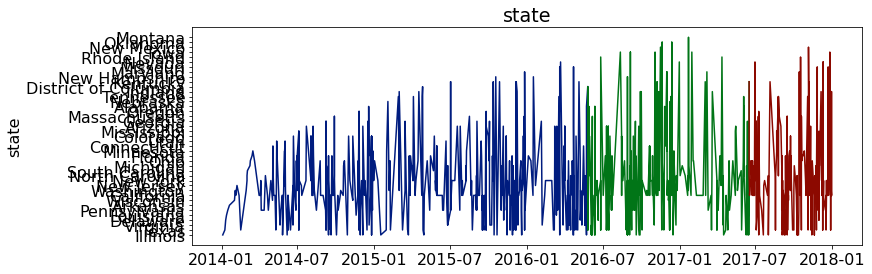

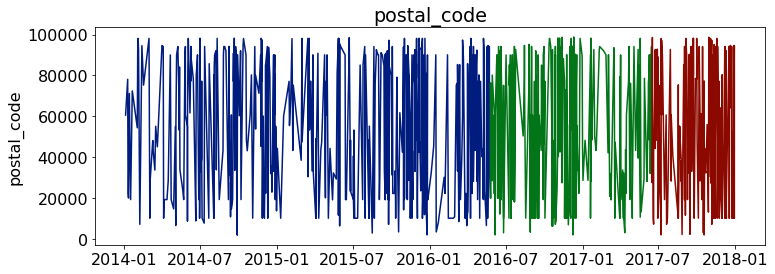

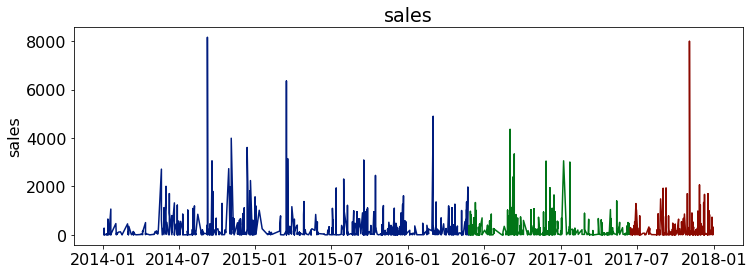

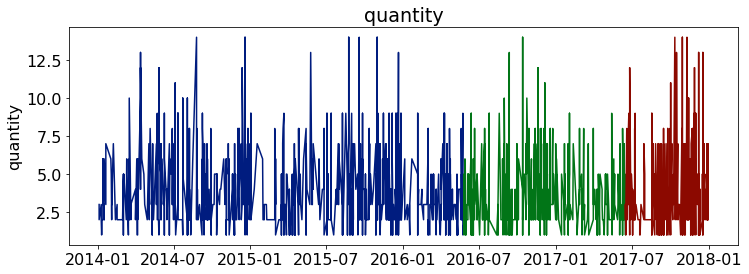

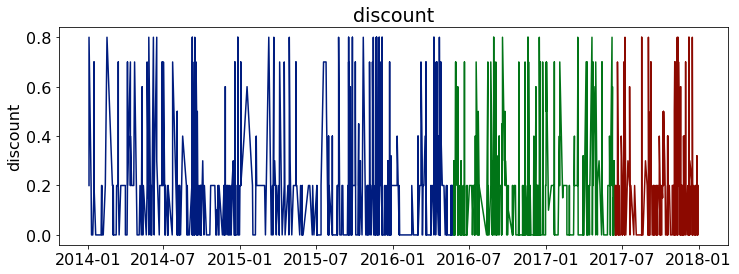

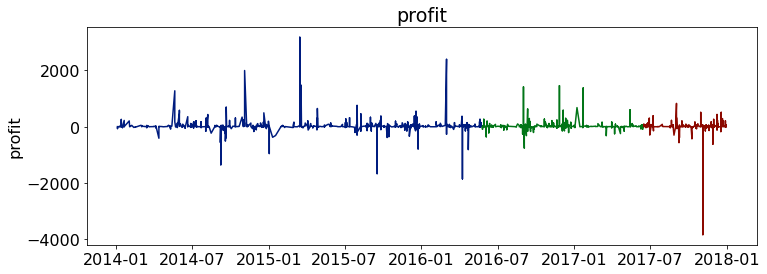

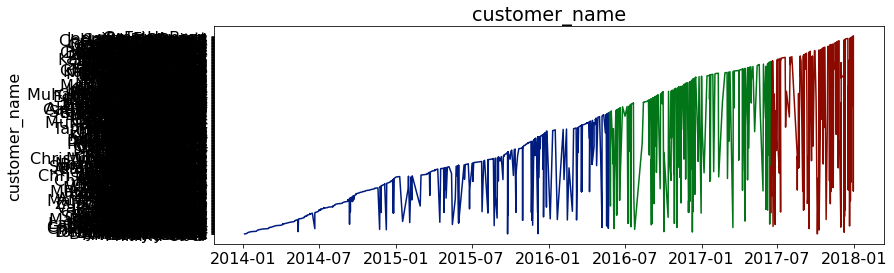

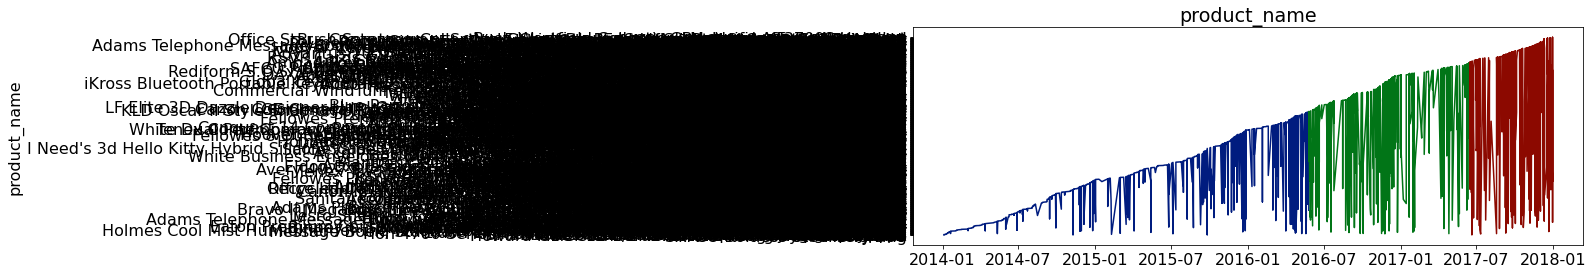

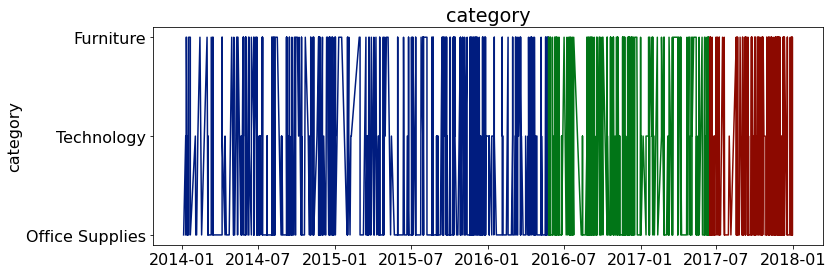

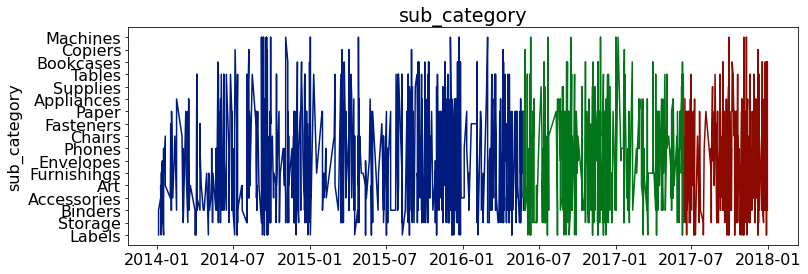

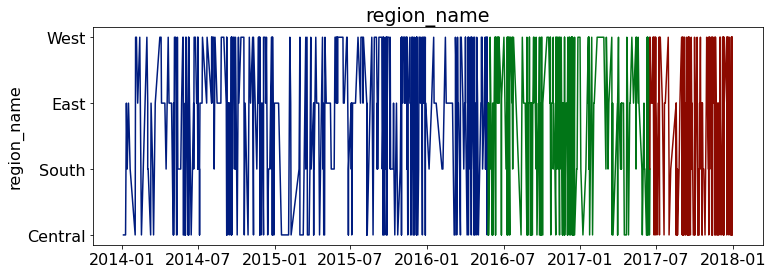

In [32]:
for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [33]:
train.columns

Index(['ship_date', 'ship_mode', 'segment', 'country', 'city', 'state',
       'postal_code', 'sales', 'quantity', 'discount', 'profit',
       'customer_name', 'product_name', 'category', 'sub_category',
       'region_name'],
      dtype='object')

[Text(0.5, 1.0, 'Average Sales by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Sales($M)')]

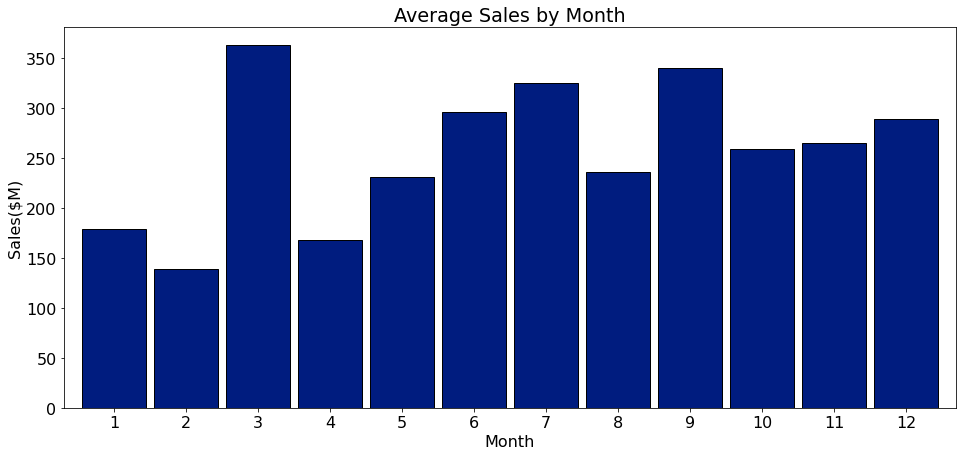

In [34]:
# Take a look at sales by month
ax = train.sales.groupby(train.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Month', xlabel='Month', ylabel='Sales($M)')


<AxesSubplot:xlabel='Order Date'>

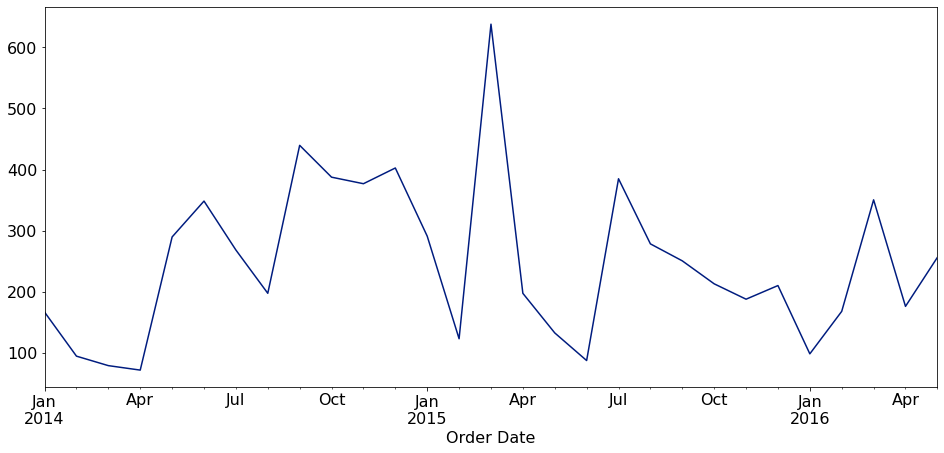

In [35]:
train.sales.resample('M').mean().plot()

[Text(0.5, 1.0, 'Average Sales by Year'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Sales($M)')]

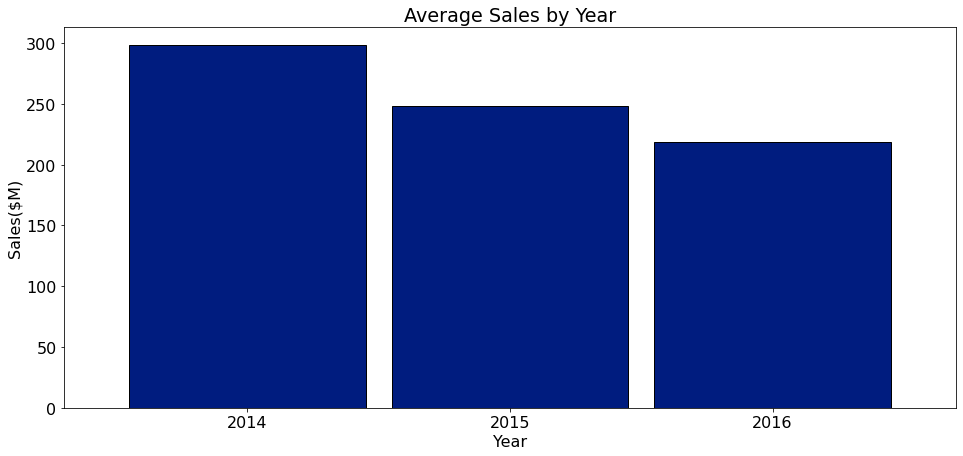

In [36]:
# Take a look at sales by year
ax = train.sales.groupby(train.index.year).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Year', xlabel='Year', ylabel='Sales($M)')


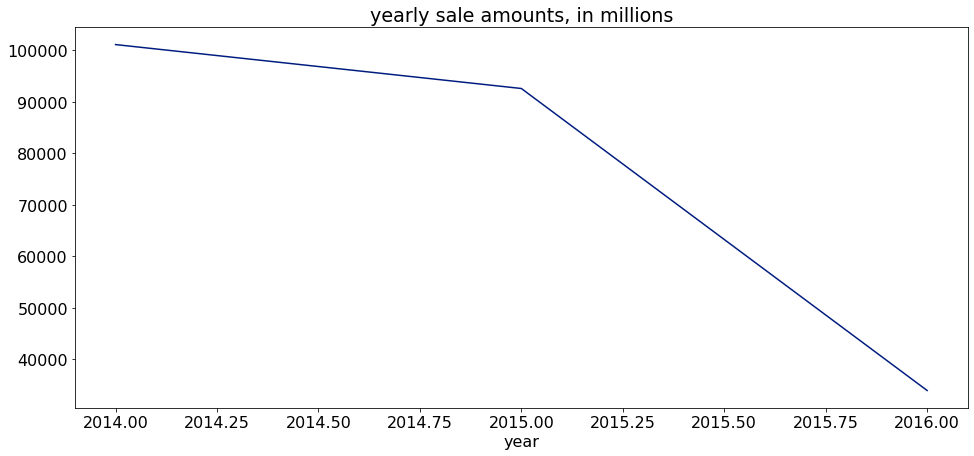

In [37]:
train['year'] = train.index.year
train.groupby('year').sales.sum().plot()
plt.title('yearly sale amounts, in millions')
plt.show()


<AxesSubplot:title={'center':'Average monthly change in sale amount'}, xlabel='Order Date'>

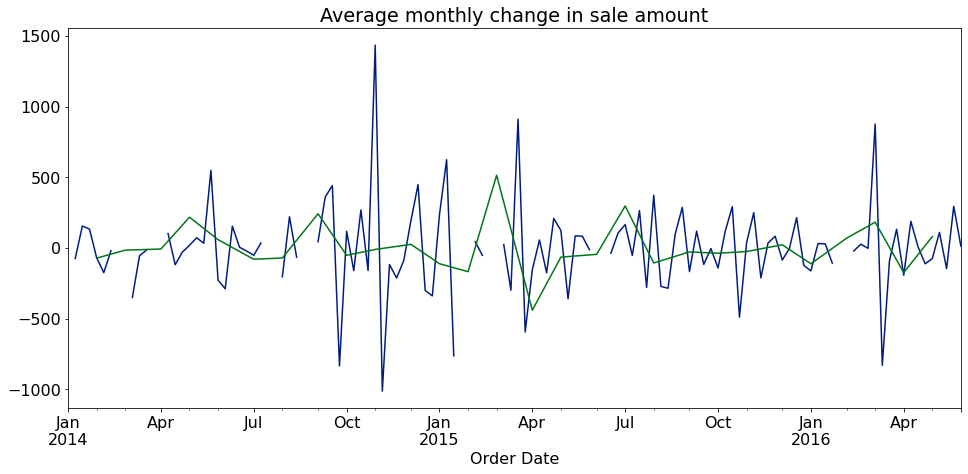

In [38]:
ax = train.sales.resample('W').mean().diff().plot(title='Average week-to-week change in sale amount')
train.sales.resample('M').mean().diff().plot(ax=ax, title='Average monthly change in sale amount')

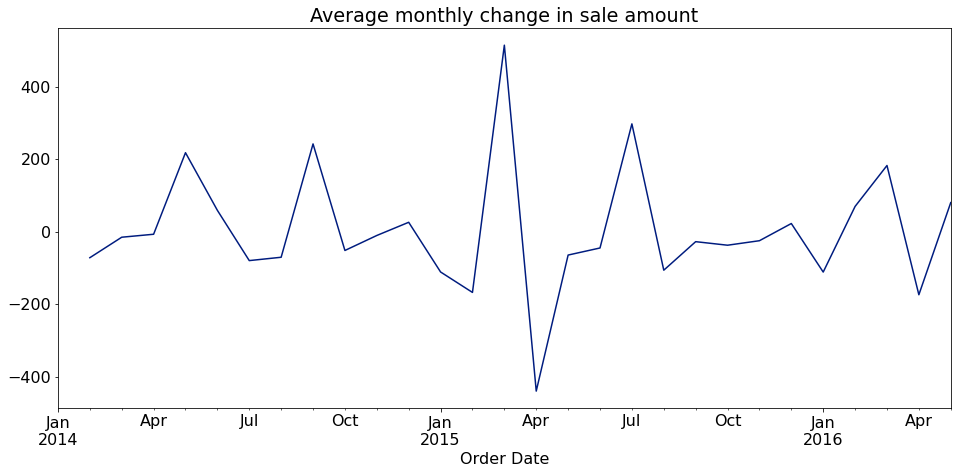

In [39]:
# monthly change by itself
ax= train.sales.resample('M').mean().diff().plot(title='Average monthly change in sale amount')

### Let's start looking at sales category and customer segment 

**Question: Is there a product category that is particularly profitable for us?**

<AxesSubplot:xlabel='category', ylabel='profit'>

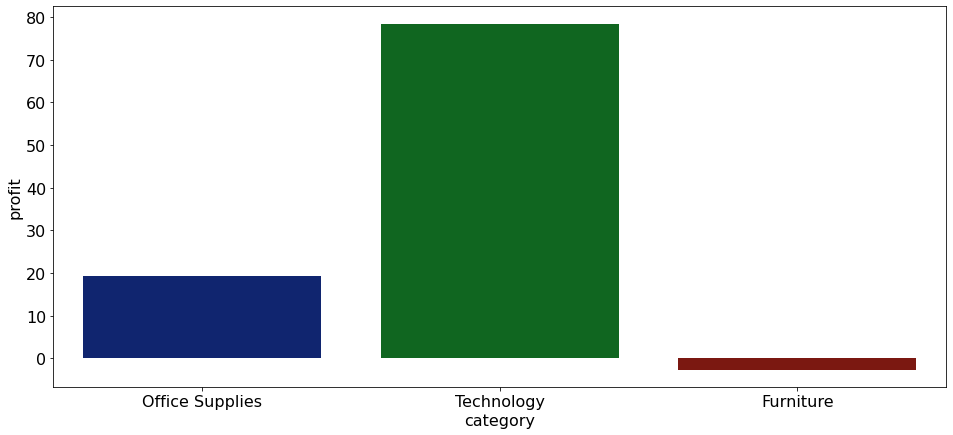

In [40]:
sns.barplot(x='category', y='profit', data= train, ci=None)

**Takeaway: Technology is by far the most profitable product category.**

**Question: Does one or another stand out in terms of sales volume?**

<AxesSubplot:xlabel='category', ylabel='sales'>

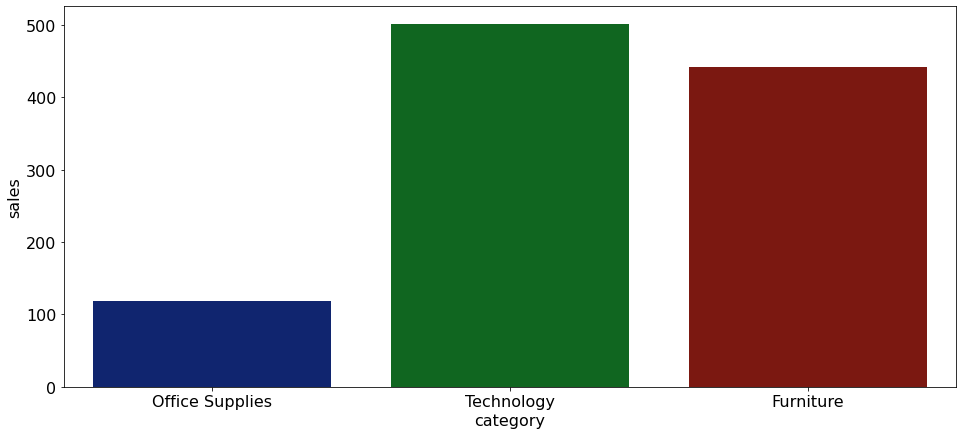

In [41]:
sns.barplot(x='category', y='sales', data= train, ci=None)

**Takeway: Technology also makes up the most sales volume but furniture is a close second.**

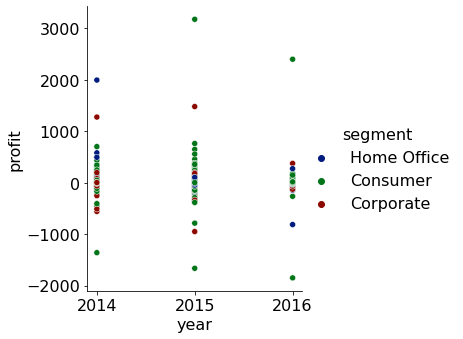

In [42]:
sns.relplot(x='year', y='profit', data= train, hue='segment')

**Question: Does profitability/sales volumne vary be customer segment?**

<AxesSubplot:xlabel='category', ylabel='sales'>

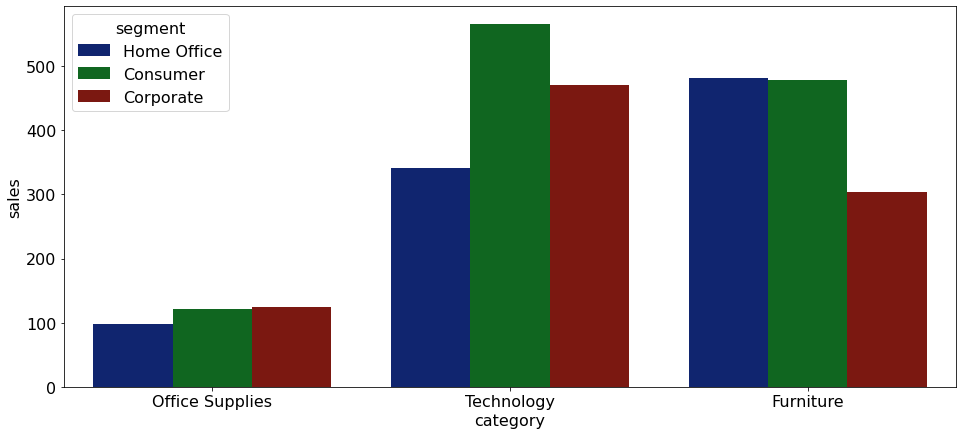

In [43]:
sns.barplot(x='category', y='sales', data= train, hue='segment', ci=None)

**There is some significant variability for sales categories by customer segment. Based on this, it seems that the greatest room for growth is in the office supplies category and the home office customer segment.**

<AxesSubplot:xlabel='category', ylabel='profit'>

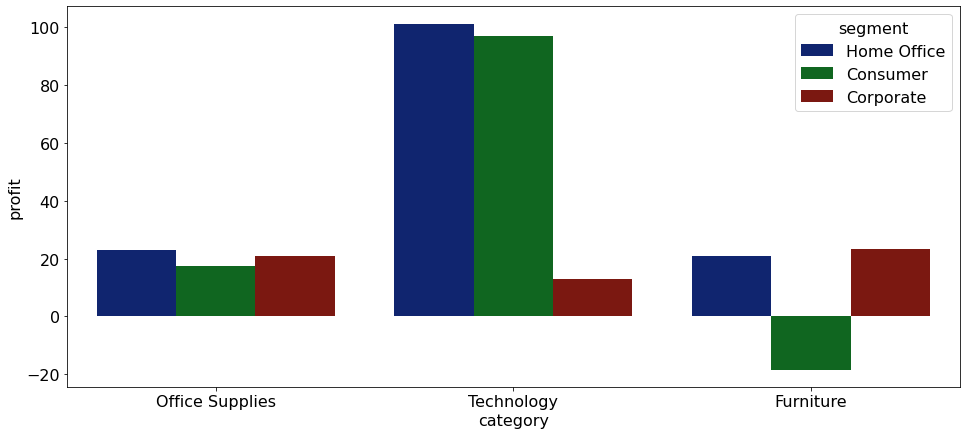

In [44]:
# Let's visualize the same thing using profit instead of sales
sns.barplot(x='category', y='profit', data= train, hue='segment', ci=None)

**This visualization confirms that home office is the most profitable customer segment and may be worth expanding.**

In [45]:
# Createa data frames for each product category
office_supplies = train.loc[train['category'] == 'Office Supplies']
furniture = train.loc[train['category'] == 'Furniture']
technology = train.loc[train['category'] == 'Technology']


#office_supplies = office_supplies.sort_values('Order Date')
#office_supplies = office_supplies.groupby('Order Date')['sales'].sum().reset_index()
#office_supplies.head()

In [46]:
technology.head()

,ship_date,ship_mode,segment,country,city,state,postal_code,sales,quantity,discount,profit,customer_name,product_name,category,sub_category,region_name,year
Order Date,,,,,,,,,,,,,,,,,
2014-01-09,2014-01-13,Standard Class,Consumer,United States,Laredo,Texas,78041.0,31.20,3.0,0.2,9.7500,Melanie Seite,Memorex Micro Travel Drive 8 GB,Technology,Accessories,Central,2014
2014-01-13,2014-01-15,Second Class,Corporate,United States,Bossier City,Louisiana,71111.0,646.74,6.0,0.0,258.6960,Chris Selesnick,Plantronics S12 Corded Telephone Headset System,Technology,Accessories,South,2014
2014-01-16,2014-01-18,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19134.0,124.20,3.0,0.4,-31.0500,Delfina Latchford,AT&T 841000 Phone,Technology,Phones,East,2014
2014-01-20,2014-01-26,Standard Class,Consumer,United States,Jonesboro,Arkansas,72401.0,699.93,7.0,0.0,181.9818,Hunter Lopez,Apple iPhone 5C,Technology,Phones,South,2014
2014-02-01,2014-02-03,First Class,Consumer,United States,Green Bay,Wisconsin,54302.0,468.90,6.0,0.0,206.3160,Bradley Drucker,Enermax Aurora Lite Keyboard,Technology,Accessories,Central,2014


### Let's look into product subgroups within the product categories

<AxesSubplot:xlabel='sub_category', ylabel='profit'>

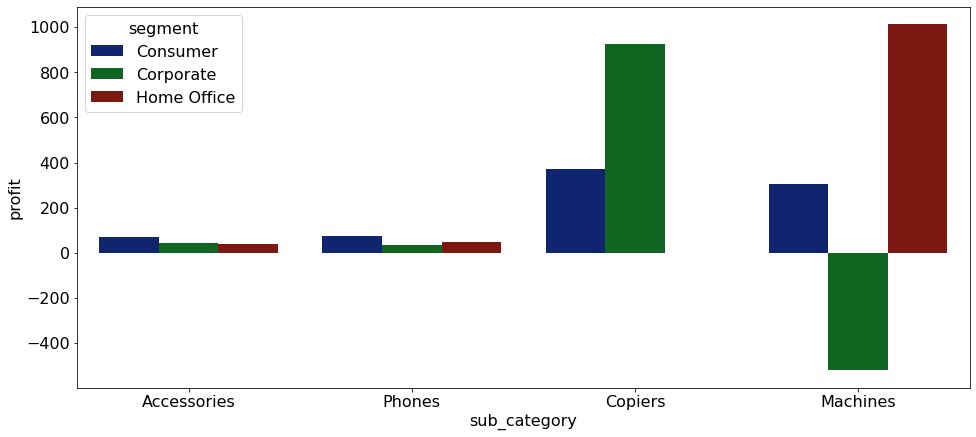

In [57]:
sns.barplot(x='sub_category', y='profit', data= technology, hue='segment', ci=None)

<AxesSubplot:xlabel='sub_category', ylabel='sales'>

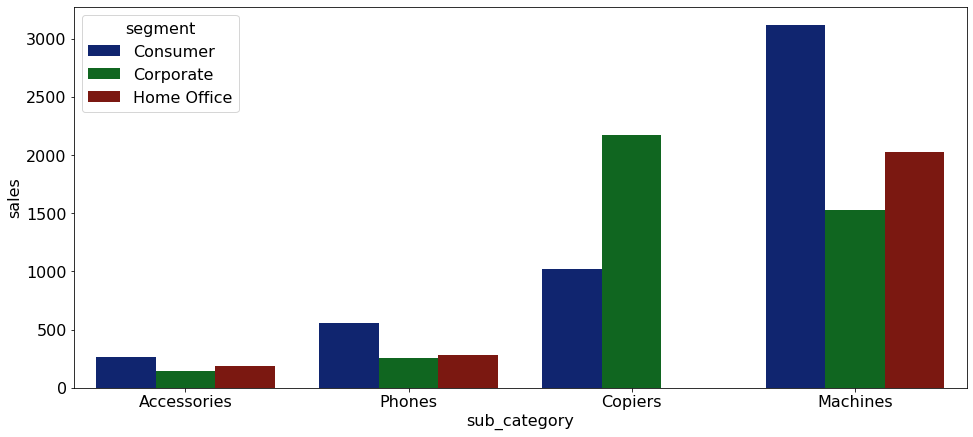

In [56]:
### Let me dive a little deeper in tech products by checking sales volumne
sns.barplot(x='sub_category', y='sales', data= technology, hue='segment', ci=None)

**Machines seem to be the most profitable kind of technology product though the company is losing money on machine sales in the corporate customer segment. We may want to reduce sales for corporate customers and attempt to expand machine sales in the home office and consumer segments.**

<AxesSubplot:xlabel='sub_category', ylabel='profit'>

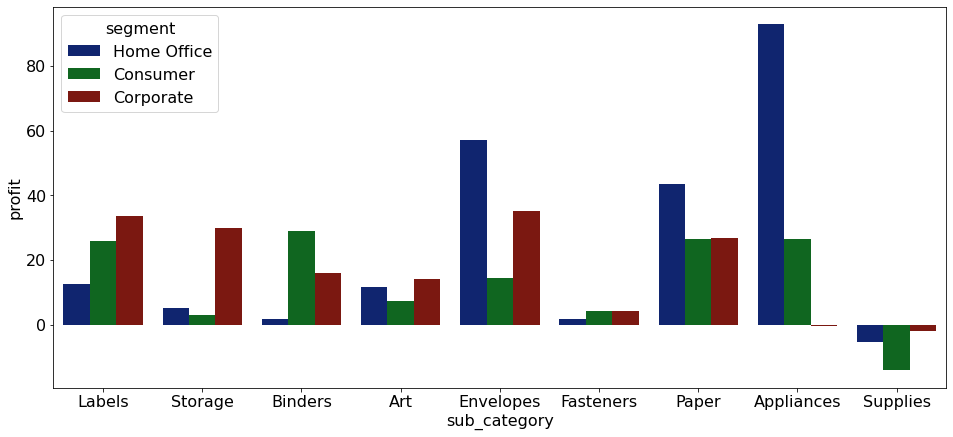

In [58]:
sns.barplot(x='sub_category', y='profit', data= office_supplies, hue='segment', ci=None)

**We might consider expanding appliance sales as they are very profitable, particularly in the home office segment.**

<AxesSubplot:xlabel='sub_category', ylabel='profit'>

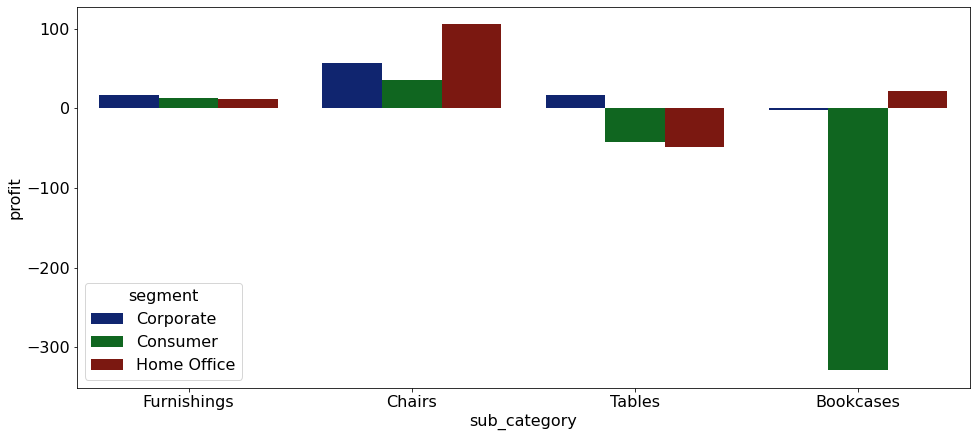

In [59]:
sns.barplot(x='sub_category', y='profit', data= furniture, hue='segment', ci=None)

**Bookcase sales are particularly un-profitable for us. We are losing a lot of money here. Fof furniture it seems that chairs are the most profitble product type.**

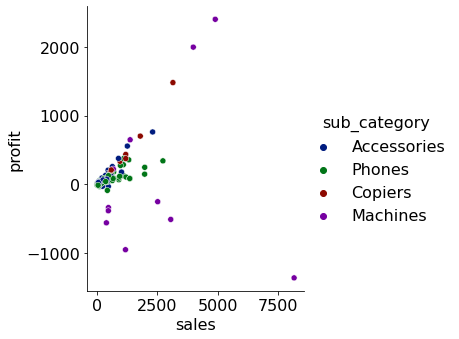

In [76]:
# Let's look at profit and sales by sub category
sns.relplot(x='sales', y='profit', data = technology, hue = 'sub_category')

**It looks like certain products particularly amongst machines are unprofitable with a high amount of sales volume while there are a couple very profitable products that are machines. Perhaps we can cut out the unprofitable products and attempt to increase sales volume for the more profitable produts.**

## I want to dive a little deeper into technology products in the home office customer segment

In [60]:
home_office_tech = train.loc[(train['category'] == 'Technology') & (train['segment'] == 'Home Office')]

In [61]:
home_office_tech.head()

,ship_date,ship_mode,segment,country,city,state,postal_code,sales,quantity,discount,profit,customer_name,product_name,category,sub_category,region_name,year
Order Date,,,,,,,,,,,,,,,,,
2014-03-03,2014-03-08,Standard Class,Home Office,United States,New York City,New York,10035.0,9.990,1.0,0.0,4.5954,Anne Pryor,PowerGen Dual USB Car Charger,Technology,Phones,East,2014
2014-04-06,2014-04-08,First Class,Home Office,United States,Philadelphia,Pennsylvania,19143.0,116.784,2.0,0.2,21.8970,Shirley Daniels,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,Technology,Accessories,East,2014
2014-06-09,2014-06-13,Second Class,Home Office,United States,Huntsville,Texas,77340.0,63.984,2.0,0.2,10.3974,Carl Weiss,Logitech M510 Wireless Mouse,Technology,Accessories,Central,2014
2014-06-09,2014-06-13,Second Class,Home Office,United States,Huntsville,Texas,77340.0,7.992,1.0,0.2,0.5994,Carl Weiss,Square Credit Card Reader,Technology,Phones,Central,2014
2014-07-12,2014-07-16,Standard Class,Home Office,United States,Los Angeles,California,90036.0,255.936,8.0,0.2,28.7928,Ben Ferrer,GE DSL Phone Line Filter,Technology,Phones,West,2014


<AxesSubplot:xlabel='sub_category', ylabel='profit'>

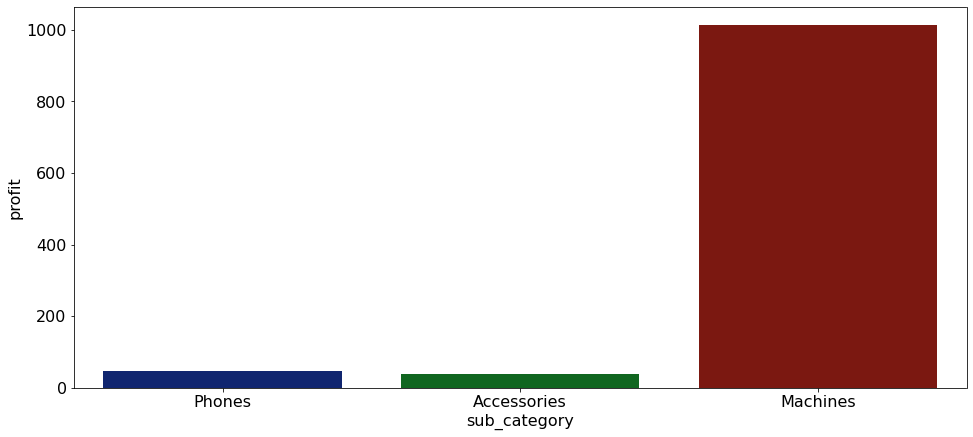

In [71]:
sns.barplot(x='sub_category', y='profit', data= home_office_tech, ci=None)

<AxesSubplot:xlabel='product_name', ylabel='profit'>

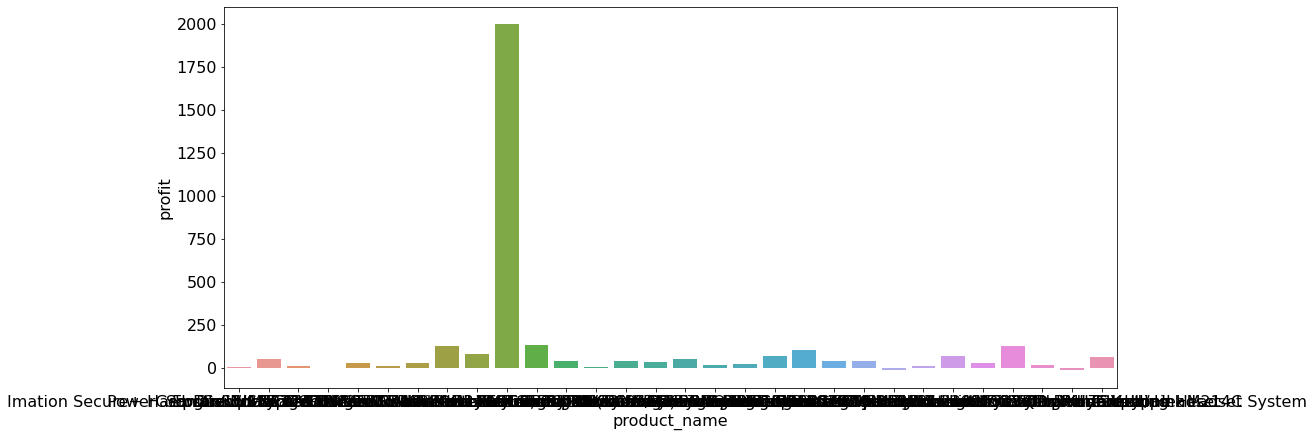

In [72]:
sns.barplot(x='product_name', y='profit', data= home_office_tech, ci=None)

In [69]:
home_office_tech.product_name.value_counts()

Imation Secure+ Hardware Encrypted USB 2.0 Flash Drive; 16GB                                                     3
SanDisk Ultra 32 GB MicroSDHC Class 10 Memory Card                                                               2
PowerGen Dual USB Car Charger                                                                                    1
Memorex Micro Travel Drive 16 GB                                                                                 1
V7 USB Numeric Keypad                                                                                            1
Jabra BIZ 2300 Duo QD Duo Corded Headset                                                                         1
Aastra 57i VoIP phone                                                                                            1
Plantronics Cordless Phone Headset with In-line Volume - M214C                                                   1
Logitech G19 Programmable Gaming Keyboard                                       

## Create predictions/forecasts using Profit as Target

### Last Observed Value

In [ ]:
def make_predictions_profit():
    yhat_df = pd.DataFrame({'profit': [profit],
                           }, index = validate.index)
    return yhat_df

In [ ]:
#Drop everything except sales
train = train[['profit']]
validate = validate[['profit']]
test = test[['profit']]

In [ ]:
profit = train['profit'][-1:][0]
profit

In [ ]:
#predictions based on last observed value
yhat_df = pd.DataFrame({'profit': [profit]},  
                      index = validate.index)

yhat_df.head()

In [ ]:
plot_and_eval('profit')

In [ ]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'last_observed_value',target_var = col)
eval_df

In [ ]:
profit = round(train['profit'].mean(),2)


yhat_df = pd.DataFrame({'profit': [profit]}, index = validate.index)

yhat_df.head()

### Simple Average

In [ ]:

for col in train.columns:
    eval_df = append_eval_df(model_type='simple_average', 
                             target_var = 'profit')
eval_df


### Moving Averages

In [ ]:
#Profit for 3 months
profit = round(train['profit'].rolling(3).mean()[-1], 2)
yhat_df = make_predictions_profit()

In [ ]:
eval_df = append_eval_df(model_type='3 month moving average', target_var = col)
eval_df

In [ ]:
#What about 6months, one year, two years and so on for moving average
periods = [6, 9, 12, 24, 36, 48]

for p in periods:
    profit = round(train['profit'].rolling(p).mean()[-1], 2)
    yhat_df = make_predictions_profit()
    model_type = str(p) + ' month moving average'
    for col in train.columns:
        eval_df = append_eval_df(model_type = model_type, 
                                 target_var = col)

In [ ]:
eval_df